### Naive Bayes

Basic Naive Bayes assumes categorical data. A simple extension for real- valued data is called Gaussian Naive Bayes. 

In machine learning we are often interested in selecting the best hypothesis (h) given data (d).
In a classification problem, our hypothesis (h) may be the class to assign for a new data instance
(d).  One of the easiest ways of selecting the most probable hypothesis given the data that we
have that we can use as our prior knowledge about the problem.  Bayes Theorem provides a
way that we can calculate the probability of a hypothesis given our prior knowledge.  Bayes
Theorem is stated as:


P(h|d) = P(d|h) x P(h) / P(d)


Where:

- P(h|d) is the probability of hypothesis h
given the data d. This is called the posterior
probability.

- P(d|h) is the probability of data d given that the hypothesis h
was true

- P(h) is the probability of hypothesis h being true (regardless of the data). This is called
the prior probability of h.

- P(d) is the probability of the data regardless of the hypothesis

20.1    Tutorial Dataset

The dataset describes two categorical input variables and a class variable that has two outputs.


In [33]:
from io import StringIO
import pandas as pd
import numpy as np

In [34]:
dataset = StringIO("""Weather Car Class
sunny working go-out
rainy broken go-out
sunny working go-out
sunny working go-out
sunny working go-out
rainy broken stay-home
rainy broken stay-home
sunny working stay-home
sunny broken stay-home
rainy broken stay-home
""")

In [35]:
def clean_cols(cols): return cols.lower().strip() 

In [36]:
nb = pd.read_csv(dataset, sep=" ").rename(columns = clean_cols)
nb.sample(3)

,weather,car,class
4,sunny,working,go-out
2,sunny,working,go-out
1,rainy,broken,go-out


In [37]:
# encode categorical variable
nb['class'] = nb['class'].eq('go-out').astype(int)
nb['weather'] = nb['weather'].eq('sunny').astype(int)
nb['car'] = nb['car'].eq('working').astype(int)

In [38]:
nb

,weather,car,class
0,1,1,1
1,0,0,1
2,1,1,1
3,1,1,1
4,1,1,1
5,0,0,0
6,0,0,0
7,1,1,0
8,1,0,0
9,0,0,0


There are two types of quantities that need to be calculated from the dataset for the naive
Bayes model:

- Class Probabilities.

- Conditional Probabilities.

Let’s start with the class probabilities.

In [39]:
# class probabilities count of each class / total examples

p_go = nb['class'].eq(1).sum() / nb.shape[0]
p_sh = nb['class'].eq(0).sum() / nb.shape[0]
p_go, p_sh

(0.5, 0.5)

p(d|h) The conditional probabilities are the probability of each input value given each class value.  The
conditional probabilities for the dataset can be calculated as follows:


In [40]:
# example  p(weather=sunny| class=go-out) = count(weather=sunny & class=go-out) / count(class=go-out)

p_s_go = np.sum(nb['class'].eq(1) & nb['weather'].eq(1)) / nb['class'].eq(1).sum()
p_r_go = np.sum(nb['class'].eq(1) & nb['weather'].eq(0)) / nb['class'].eq(1).sum()
p_s_sh = np.sum(nb['class'].eq(0) & nb['weather'].eq(1)) / nb['class'].eq(0).sum()
p_r_sh = np.sum(nb['class'].eq(0) & nb['weather'].eq(0)) / nb['class'].eq(0).sum()

# and for car variable

p_wk_go = np.sum(nb['class'].eq(1) & nb['car'].eq(1)) / nb['class'].eq(1).sum()
p_bk_go = np.sum(nb['class'].eq(1) & nb['car'].eq(0)) / nb['class'].eq(1).sum()
p_wk_sh = np.sum(nb['class'].eq(0) & nb['car'].eq(1)) / nb['class'].eq(0).sum()
p_bk_sh = np.sum(nb['class'].eq(0) & nb['car'].eq(0)) / nb['class'].eq(0).sum()

In [41]:
p_s_go

0.8

### Making predictions

We don't need a probability to predict the most likely class for a new data instance.
We only need the numerator and the class that gives the largest response, which will be the
predicted output

MAP
(
h
) =
max
(
P
(
d
|
h
)
×
P
(
h
))

lets make a prediction for the first row of data

In [42]:
nb.loc[0]

weather    1
car        1
class      1
Name: 0, dtype: int32

In [43]:
# p(d|h) we have the data but we need to access which hypothesis yeilds a bigger probability
go_out = p_s_go * p_wk_go * p_go
stay_home = p_s_sh * p_wk_sh * p_sh

In [44]:
# we correctly predicted go-out
go_out, stay_home

(0.32000000000000006, 0.04000000000000001)

In [45]:
nb.loc[1]

weather    0
car        0
class      1
Name: 1, dtype: int32

In [46]:
# incorrect predictions for row 2
go_out = p_bk_go * p_r_go * p_go
stay_home = p_bk_sh * p_r_sh * p_sh
go_out, stay_home

(0.020000000000000004, 0.24)

In [47]:
nb.loc[2]

weather    1
car        1
class      1
Name: 2, dtype: int32

In [48]:
# correctly predicted go out
go_out = p_s_go * p_wk_go * p_go
stay_home = p_s_sh * p_wk_sh * p_sh
go_out, stay_home

(0.32000000000000006, 0.04000000000000001)

### Gaussian Naive Bayes

A simple dataset was contrived for our purposes. It is comprised of two input variables X1 and
X2 and one output variable Y . The input variables are drawn from a Gaussian distribution,
which is one assumption made by Gaussian Naive Bayes. The class variable has two values, 0
and 1, therefore the problem is a binary classication problem.

In [49]:

dataset = StringIO("""X1 X2 Y
3.393533211 2.331273381 0
3.110073483 1.781539638 0
1.343808831 3.368360954 0
3.582294042 4.67917911 0
2.280362439 2.866990263 0
7.423436942 4.696522875 1
5.745051997 3.533989803 1
9.172168622 2.511101045 1
7.792783481 3.424088941 1
7.939820817 0.791637231 1
""")

In [50]:
gnb = pd.read_csv(dataset, sep=' ').rename(columns = clean_cols)

In [51]:
gnb

,x1,x2,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


In [52]:
from probability import normal_pdf

P(both|older): 0.5008888011060636
P(both|either): 0.3368756641870351


In [63]:
xs = [x/ 10 for x in range(-50,51)]
pdf_example = pd.Series(index=xs, data = [normal_pdf(x) for x in xs])
pdf_example

-5.0    0.000001
-4.9    0.000002
-4.8    0.000004
-4.7    0.000006
-4.6    0.000010
          ...   
 4.6    0.000010
 4.7    0.000006
 4.8    0.000004
 4.9    0.000002
 5.0    0.000001
Length: 101, dtype: float64

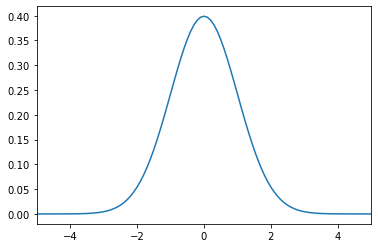

In [64]:
pdf_example.plot();

There are two types of probabilities that we need to summarize from our training data for the
naive Bayes model:

- Class Probabilities.
- Conditional Probabilities.

In [65]:
# class probs
p_y_1 = gnb['y'].eq(1).sum()/ gnb['y'].count()
p_y_0 = gnb['y'].eq(0).sum()/ gnb['y'].count()

The X1 and X2 input variables are real values. As such we will model them as having being
drawn from a Gaussian distribution. This will allow us to estimate the probability of a given
value using the Gaussian PDF described above.

The Gaussian PDF requires two parameters in
addition to the value for which the probability is being estimated: the mean and the standard
deviation. Therefore we must estimate the mean and the standard deviation for each group of
conditional probabilities that we require.

In [66]:
# conditional probabilities
# P(X1|Y=0); P(X1|Y=1)...


In [67]:
p_x1_y0_mean = gnb.loc[gnb['y'].eq(0), 'x1'].mean()
p_x1_y1_mean = gnb.loc[gnb['y'].eq(1), 'x1'].mean()
p_x2_y0_mean = gnb.loc[gnb['y'].eq(0), 'x2'].mean()
p_x2_y1_mean = gnb.loc[gnb['y'].eq(1), 'x2'].mean()
p_x1_y0_std = gnb.loc[gnb['y'].eq(0), 'x1'].std()
p_x1_y1_std = gnb.loc[gnb['y'].eq(1), 'x1'].std()
p_x2_y0_std = gnb.loc[gnb['y'].eq(0), 'x2'].std()
p_x2_y1_std = gnb.loc[gnb['y'].eq(1), 'x2'].std()


#### Make Prediction with Gaussian Naive Bayes

We can make predictions using Bayes Theorem, introduced and explained in a previous chapter.
We don't need a probability to predict the most likely class for a new data instance. We only
need the numerator and the class that gives the largest response is the predicted response.

MAP(h) = max(P(d|h) x P(h))

Let's take the first record from our dataset and use our learned model to predict which class
we think it belongs. Instance: X1 = 3:393533211, X2 = 2:331273381, Y = 0. We can plug the
probabilities for our model in for both classes and calculate the response. Starting with the
response for the output class 0. We multiply the conditional probabilities together and multiply
it by the probability of any instance belonging to the class.

In [70]:
# looking at first data example
gnb.loc[0]

x1    3.393533
x2    2.331273
y     0.000000
Name: 0, dtype: float64

In [60]:
# class 0 = P(pdf(X1)|class = 0) x P(pdf(X2)|class = 0) x P(class = 0)
# for response y equal to 0
p1 = normal_pdf(gnb.loc[0, 'x1'], mu=p_x1_y0_mean, sigma=p_x1_y0_std) 
p2 = normal_pdf(gnb.loc[0, 'x2'], mu=p_x2_y0_mean, sigma=p_x2_y0_std) 
y_0 = p1 * p2 * p_y_0
# for response y equal to 1
p1 = normal_pdf(gnb.loc[0, 'x1'], mu=p_x1_y1_mean, sigma=p_x1_y1_std) 
p2 = normal_pdf(gnb.loc[0, 'x2'], mu=p_x2_y1_mean, sigma=p_x2_y1_std) 
y_1 = p1 * p2 * p_y_1

# prediction is 0
y_0, y_1

(0.05032427673372073, 0.00011557718379945826)

In [69]:
from typing import Tuple

def gaussian_nb_prediction(index: int)-> Tuple[float, float]:
    """
    Based on x1 and x2 index returns output for 
    output class y = 0 and y= 1
    """
    # hardcoded probabilities for naive bayes
    p_x1_y0_mean = gnb.loc[gnb['y'].eq(0), 'x1'].mean()
    p_x1_y1_mean = gnb.loc[gnb['y'].eq(1), 'x1'].mean()
    p_x2_y0_mean = gnb.loc[gnb['y'].eq(0), 'x2'].mean()
    p_x2_y1_mean = gnb.loc[gnb['y'].eq(1), 'x2'].mean()
    p_x1_y0_std = gnb.loc[gnb['y'].eq(0), 'x1'].std()
    p_x1_y1_std = gnb.loc[gnb['y'].eq(1), 'x1'].std()
    p_x2_y0_std = gnb.loc[gnb['y'].eq(0), 'x2'].std()
    p_x2_y1_std = gnb.loc[gnb['y'].eq(1), 'x2'].std()
    
    # example class 0 = P(pdf(X1)|class = 0) x P(pdf(X2)|class = 0) x P(class = 0)
    
    # for response y equal to 0
    p1 = normal_pdf(gnb.loc[index, 'x1'], mu=p_x1_y0_mean, sigma=p_x1_y0_std) 
    p2 = normal_pdf(gnb.loc[index, 'x2'], mu=p_x2_y0_mean, sigma=p_x2_y0_std)
    y_0 = p1 * p2 * p_y_0
    
    # for response y equal to 1
    p1 = normal_pdf(gnb.loc[index, 'x1'], mu=p_x1_y1_mean, sigma=p_x1_y1_std) 
    p2 = normal_pdf(gnb.loc[index, 'x2'], mu=p_x2_y1_mean, sigma=p_x2_y1_std)
    y_1 = p1 * p2 * p_y_1
    
    return y_0, y_1
    
    
    

In [61]:
outputs = pd.DataFrame(data = [gaussian_nb_prediction(idx) for idx in gnb.index.values], 
                       columns=['output_y0','output_y1'])
gnb_predictions = pd.concat([gnb, outputs], axis=1)
gnb_predictions

,x1,x2,y,output_y0,output_y1
0,3.393533,2.331273,0,5.032428e-02,1.155772e-04
1,3.110073,1.781540,0,3.891230e-02,4.025712e-05
2,1.343809,3.368361,0,2.354196e-02,1.067712e-07
3,3.582294,4.679179,0,1.640435e-02,1.089305e-04
4,2.280362,2.866990,0,6.797275e-02,3.892921e-06
5,7.423437,4.696523,1,6.919582e-08,2.202730e-02
6,5.745052,3.533990,1,3.624019e-04,1.313337e-02
7,9.172169,2.511101,1,2.446300e-12,1.893726e-02
8,7.792783,3.424089,1,2.548609e-08,4.197207e-02
9,7.939821,0.791637,1,1.542597e-09,1.363675e-02


In [62]:
# based on max value by row calculate prediction value
gnb_predictions['prediction'] = outputs.idxmax(axis='columns').eq('output_y1').astype(int)
# 100% accuracy
gnb_predictions

,x1,x2,y,output_y0,output_y1,prediction
0,3.393533,2.331273,0,5.032428e-02,1.155772e-04,0
1,3.110073,1.781540,0,3.891230e-02,4.025712e-05,0
2,1.343809,3.368361,0,2.354196e-02,1.067712e-07,0
3,3.582294,4.679179,0,1.640435e-02,1.089305e-04,0
4,2.280362,2.866990,0,6.797275e-02,3.892921e-06,0
5,7.423437,4.696523,1,6.919582e-08,2.202730e-02,1
6,5.745052,3.533990,1,3.624019e-04,1.313337e-02,1
7,9.172169,2.511101,1,2.446300e-12,1.893726e-02,1
8,7.792783,3.424089,1,2.548609e-08,4.197207e-02,1
9,7.939821,0.791637,1,1.542597e-09,1.363675e-02,1


This section provides some tips for preparing your data for Naive Bayes.

- Categorical Inputs: Naive Bayes assumes label attributes such as binary, categorical or
nominal.
- Gaussian Inputs: If the input variables are real-valued, a Gaussian distribution is
assumed. In which case the algorithm will perform better if the univariate distributions of
your data are Gaussian or near-Gaussian. This may require removing outliers (e.g. values
that are more than 3 or 4 standard deviations from the mean).
- Classification Problems: Naive Bayes is a classification algorithm suitable for binary
and multi-class classification.
- Log Probabilities: The calculation of the likelihood of different class values involves
multiplying a lot of small numbers together. This can lead to an under
ow of numerical precision. As such it is good practice to use a log transform of the probabilities to avoid
this underflow.
- Kernel Functions: Rather than assuming a Gaussian distribution for numerical input
values, more complex distributions can be used such as a variety of kernel density functions.
- Update Probabilities: When new data becomes available, you can simply update the
probabilities of your model. This can be helpful if the data changes frequently

In this chapter you discovered how to implement the Gaussian Naive Bayes classifier from
scratch. You learned about:

- The Gaussian Probability Density Function for estimating the probability of any given
real value.
- How to estimate the probabilities required by the Naive Bayes model from a training
dataset.
- How to use the learned Naive Bayes model to make predictions.